In [65]:
# This is a code to generate Random Number using Linear Congruential Generator Method or LCG method
# LCG method is a pseudo  random number generation mehod
# The formula used to produce random numbers is Xi+1 = (aXi+c)mod(m), for i = 1,2,3,....,k
# X0 is called seed, starting value
# a is called Multiplier
# m is called Modulus
# c is the increment

# This code takes increment c = 0 and this form of generation where c is 0 is called Multiplicative Linear Congruential Generator Method

# Random Numbers are generated by dividing Xi by m, and this is 

a = 16807
m = (2**31)-1
X = list(range(100001))
Random = list(range(100000))
X[0] = 10000

for i in range(100000):
    X[i+1] = (a*X[i])%m
    Random[i] = X[i]/m
Random = Random[1:100000]
rn = Random
print(Random)


[0.07826369259425611, 0.37788143166242233, 0.053221950332271846, 0.5013192344928715, 0.6723741216922058, 0.5918632809034844, 0.44616214486125955, 0.6471686831895116, 0.9640583661217514, 0.9289594082762298, 0.020774898594606156, 0.16372067954564498, 0.6534611236552993, 0.7211052746144614, 0.616350445252075, 0.0019333516256573385, 0.49384077242288776, 0.9818621114743231, 0.15650754894898625, 0.4223751856118325, 0.859744578068957, 0.7271236049603315, 0.7664285682916774, 0.3649472782225103, 0.6689050857298565, 0.28777586169902974, 0.6489075755928213, 0.18962298854702292, 0.9935685098141285, 0.9059444460579866, 0.20830489658205997, 0.9803968546820789, 0.5299366417014676, 0.6451370765665253, 0.8188458535908003, 0.34226130058162907, 0.3856788754396508, 0.1048595142107734, 0.3738553404686299, 0.38670725626252, 0.3888560041733347, 0.502862141236133, 0.6040077556874639, 0.5583498392060166, 0.18574753552011566, 0.8588294865837458, 0.3471810130156488, 0.0712857540097487, 0.09966764184630832, 0.114

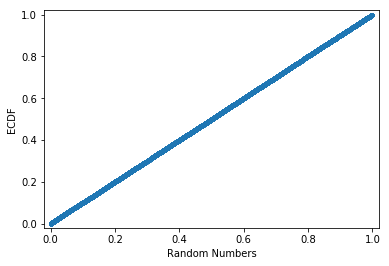

In [66]:
# Plot a cdf curve
import matplotlib.pyplot as plt
import numpy as np
x = np.sort(Random)
y = np.arange(1,len(x)+1)/len(x)
plt.plot(x,y, marker = '.', linestyle = 'none')
plt.xlabel('Random Numbers')
plt.ylabel('ECDF')
plt.margins(0.02)


#This plot indicates that the random numbers generated, have a uniform distribution


In [67]:
# Test the generator using Chi-Squared Test
# Null Hypothesis H0 = Numbers generated are iid Uniform  (0,1)
# Alt Hypothesis  H1 = Numbers generated are not Unifrm (0,1)
# Confidence interval CI = 95%, alpha = 0.05
# If the chi-sq value of the distribution is greater than critical chi-sq value at 99 degrees of freedom and 95% CI
# Then we reject the NULL Hypothesis, numbers are not iid uniform 
import scipy.stats as stats

k = 1000 # Number of Bins
e = 100 #expected Frequency
count = list(range(1000))
D = list(range(1000))
j = 0
Random = sorted(Random)
for i in range(1000):
    inc = 0
    while(Random[j]>((i)/1000) and Random[j]<((i+1)/1000)):
            inc = inc + 1
            j = j+1
            if(j==len(Random)):
                break
    count[i] = inc
print(count)
for l in range(len(count)):
    D[l] = ((count[l]-e)**2)/e

z = sum(D)    # chi-sq value of distribution
print(z)
crit = stats.chi2.ppf(q=0.95, df=999)
print(crit)

if(z<crit):
    print("Generator has passed the chi-sqaured test")
else:
    print("Generator has failed the chi-square test")
    

# As z is less than critical value hence we accpet the Null Hypothesis that the numbers are iid uniform (0,1)
# The generator has passed the Chi-Sq test

[84, 123, 107, 102, 124, 87, 107, 84, 106, 109, 92, 98, 116, 95, 88, 87, 97, 109, 87, 104, 115, 100, 103, 88, 108, 108, 100, 100, 94, 104, 111, 117, 110, 105, 97, 107, 98, 94, 91, 84, 105, 119, 109, 94, 114, 111, 103, 96, 80, 118, 112, 101, 104, 89, 94, 113, 121, 103, 81, 95, 77, 102, 108, 99, 105, 113, 84, 106, 104, 97, 92, 96, 94, 88, 110, 92, 86, 105, 99, 105, 93, 104, 103, 99, 91, 88, 90, 100, 102, 103, 92, 84, 101, 102, 99, 94, 106, 91, 86, 102, 85, 88, 84, 84, 83, 111, 96, 105, 112, 108, 76, 97, 93, 111, 101, 86, 111, 113, 68, 120, 90, 113, 91, 103, 94, 104, 84, 94, 102, 91, 99, 108, 111, 92, 86, 116, 106, 98, 104, 101, 107, 93, 100, 98, 118, 104, 96, 98, 113, 109, 111, 105, 98, 106, 103, 123, 84, 107, 111, 91, 104, 98, 105, 106, 121, 97, 93, 97, 105, 120, 84, 96, 103, 99, 114, 89, 91, 89, 92, 110, 100, 92, 100, 118, 95, 96, 89, 86, 95, 114, 88, 109, 98, 98, 118, 101, 90, 113, 113, 78, 121, 106, 96, 117, 79, 86, 87, 102, 88, 98, 98, 96, 91, 97, 98, 91, 102, 124, 95, 114, 95, 104,

In [73]:
#Lagged Correlation Test
from array import *
import scipy.stats as st
lag = [1,2,3,4]
rho = list(range(4))
sigma = list(range(4))
zval = list(range(4))
for i in range(len(lag)):
    M = int((((len(rn)-1)/lag[i])-1))
    print(M)
    z1 = 0
    for j in range(M):
        y = (rn[0+(j*lag[i])]*rn[0+((j+1)*lag[i])])
        z1 = z1+y
    print(y)    
    rho[i] = (z1/(M+1)) - 0.25
    sigma[i] = ((13*M)+7)**0.5/(12*(M+1))
    zval[i] = rho[i]/sigma[i]
print(rho)
print(sigma)
print(zval)
Zcrit = st.norm.ppf(.975)
print(Zcrit)
for k in range(len(zval)):
    if(zval[k] > -Zcrit and zval[k] < Zcrit):
        print("The generator has passed the Lagged Correlation Test")
    else:
        print("The generator has failed the Lagged Correlation Test")

99997
0.22368822832413002
49998
0.27201265074392844
33331
0.0647143905879778
24998
0.32478568437895916
[0.0006081575418410146, 0.000928479417379835, 0.0015994932884832447, 0.003040321268253321]
[0.0009501534964736558, 0.0013437168600771332, 0.0016457229924868868, 0.0019003128398590704]
[0.6400624152814203, 0.690978467983603, 0.9719091826421022, 1.5999056599958537]
1.959963984540054
The generator has passed the Lagged Correlation Test
The generator has passed the Lagged Correlation Test
The generator has passed the Lagged Correlation Test
The generator has passed the Lagged Correlation Test
